# Demo for NTU-IBMQ 2020 QCamp

In [1]:
# Jupyter Lab Magics
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [19]:
import sys, os
sys.path.append(os.path.abspath("../"))

# Define A Toy QC (Bell State)

In [20]:
from qiskit import QuantumCircuit, execute

In [21]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0,1)
qc.measure([0, 1], [0, 1])
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

# Qiskit-Aer Provider Backend

In [22]:
from qiskit import QuantumCircuit, execute
from qiskit import Aer

In [23]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0,1)
qc.measure([0, 1], [0, 1])
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [24]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()
result.get_counts()

{'00': 494, '11': 530}

# ALCom Provider Backend

In [25]:
from qiskit import QuantumCircuit, execute
from qiskit_alcom_provider import ALComProvider

In [26]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0,1)
qc.measure([0, 1], [0, 1])
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [27]:
# get an ALComProvider instance
ALCom = ALComProvider()
# from provider get a backend for our toy experiments
backend = ALCom.get_backend('qasm_simulator')
# add backend_options
# backend_options = {"method": "statevector"}
# backend_options = {"method": "counts"}
backend_options = None # default is counts mode
# execute the experiment
job = execute(qc, backend, shots=1024, backend_options=backend_options)
# get the result
result = job.result()

print(result.get_counts())

The simulator is using Counts Mode


{'00': 512, '11': 512}


# Visualization

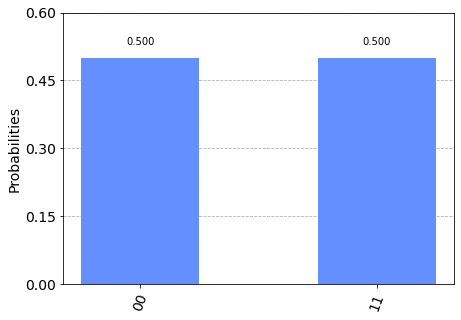

In [28]:
from qiskit.visualization import plot_histogram, plot_bloch_multivector
plot_histogram(result.get_counts())

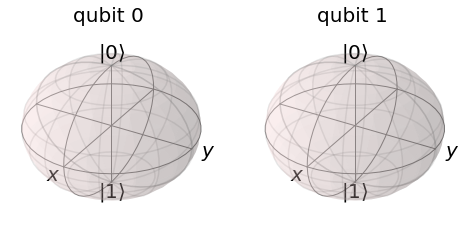

In [29]:
plot_bloch_multivector(result.get_statevector())